<a href="https://colab.research.google.com/github/CharlotteY2003/MIT-Futuremakers/blob/main/7_14_CNN_Extended_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *
from sklearn.metrics import confusion_matrix
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import gzip
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

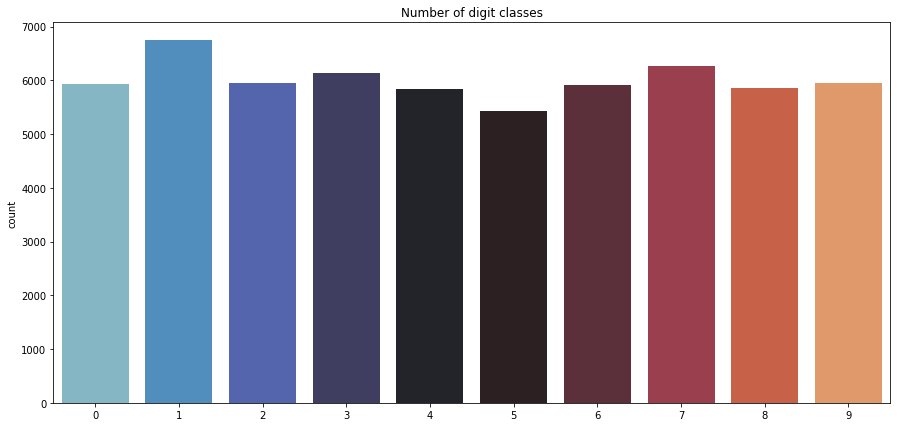

In [ ]:
plt.figure(figsize = (15,7))
g = sns.countplot(y_train, palette='icefire')
plt.title("Number of digit classes")
np.unique(y_train, return_counts = True)

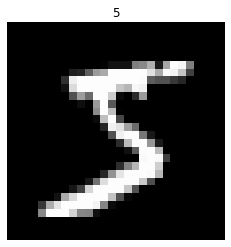

In [ ]:
img = X_train[0]
img = img.reshape(28,28)
plt.imshow(img, cmap = 'gray')
plt.title(y_train[0])
plt.axis('off')
plt.show()

In [ ]:
#Normalization to reduce illimination's differences influences
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#Make samples 3D through 28 x 28 x 1 matrices
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [ ]:
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)
#print(y_train.shape)

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .1, random_state = 2)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28, 1)
(6000, 28, 28, 1)
(54000, 10)
(6000, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(.25))
model.add(Conv2D(filters=16, kernel_size = (3,3), activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
optimizer = Adam(lr=.001, beta_1 = .9, beta_2 = .999)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
epochs = 10
batch_size = 250

In [ ]:
#Data Augumentation = artifically expand X_train by rotating image
datagen = ImageDataGenerator(rotation_range = 5, zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
datagen.fit(X_train)

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs,
                              validation_data = (X_val, y_val), steps_per_epoch = X_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
216/216 [==============================] - 57s 192ms/step - loss: 1.3512 - accuracy: 0.5342 - val_loss: 0.1618 - val_accuracy: 0.9525
Epoch 2/10
216/216 [==============================] - 41s 188ms/step - loss: 0.3769 - accuracy: 0.8809 - val_loss: 0.1034 - val_accuracy: 0.9700
Epoch 3/10
216/216 [==============================] - 41s 188ms/step - loss: 0.2833 - accuracy: 0.9117 - val_loss: 0.0881 - val_accuracy: 0.9725
Epoch 4/10
216/216 [==============================] - 41s 188ms/step - loss: 0.2327 - accuracy: 0.9285 - val_loss: 0.0751 - val_accuracy: 0.9763
Epoch 5/10
216/216 [==============================] - 41s 188ms/step - loss: 0.2090 - accuracy: 0.9351 - val_loss: 0.0667 - val_accuracy: 0.9795
Epoch 6/10
216/216 [==============================] - 41s 188ms/step - loss: 0.1894 - accuracy: 0.9428 - val_loss: 0.0633 - val_accuracy: 0.9813
Epoch 7/10
216/216 [==============================] - 41s 188ms/step - loss: 0.1735 - accuracy: 0.9469 - val_loss: 0.0558 - val_ac

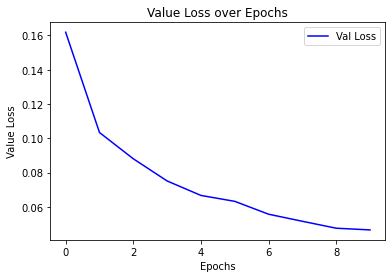

In [ ]:
plt.plot(history.history['val_loss'], color = 'b', label = 'Val Loss' )
plt.title('Value Loss over Epochs')
plt.xlabel("Epochs")
plt.ylabel("Value Loss")
plt.legend()
plt.show()

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


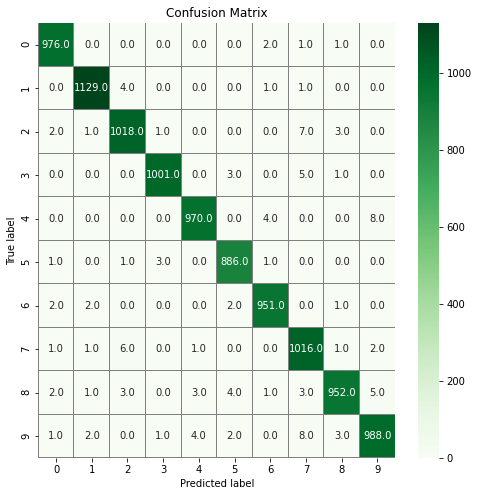

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)
print(y_pred_classes, y_true)
con_matrix = confusion_matrix(y_true, y_pred_classes)

f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(con_matrix, annot=True, linewidths=.01, cmap = "Greens", linecolor = 'gray', fmt = '.1f', ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


#Evaluation

Both CNNs performed well, although the CNN with the extended dataset performed slightly better possibly due to having a larger dataset, therefore more samples to train off of. 